#IMPORT LIBRARY

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#DECLARE DATA

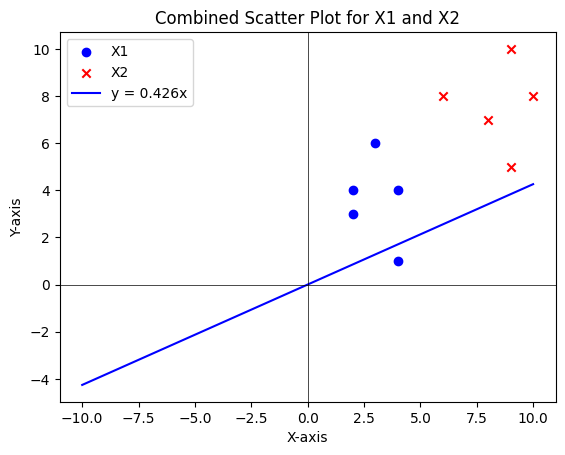

In [23]:
data = np.array([[4.,1], [2,4], [2,3], [4,4], [3,6], [9,10], [6,8], [9,5], [8,7], [10,8]])
m = 0.426
plt.scatter(data[:5, 0], data[:5, 1], color='blue', marker='o', label='X1')
plt.scatter(data[5:, 0], data[5:, 1], color='red', marker='x', label='X2')
x = np.linspace(-10, 10, 100)  # 100 points between -10 and 10

# Calculate y values using the line equation y = mx + b
y = m * x

# Plot the line
plt.plot(x, y, label=f'y = {m}x', color='blue')
# plt.scatter(data[:, 0], data[:, 1], color='red', marker='o')
# Optionally, plot the origin for reference
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add a legend to differentiate between the classes
plt.legend()

# Display the plot
plt.title("Combined Scatter Plot for X1 and X2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

#CALC MEANS




In [24]:
mean1 = []
mean2 = []
mean1.append(np.mean(data[:5,0]))
mean1.append(np.mean(data[:5,1]))
mean2.append(np.mean(data[5:,0]))
mean2.append(np.mean(data[5:,1]))
print(mean1,mean2)

[3.0, 3.6] [8.4, 7.6]


#MAKE DATA MEAN CENTRIC

(10, 2)


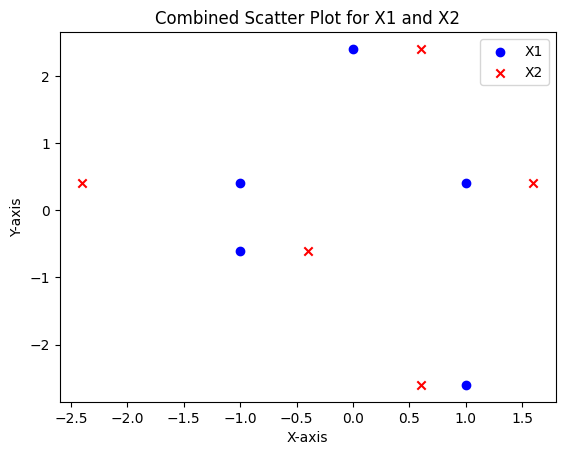

In [26]:
print(data.shape)
data1 = np.zeros((10,2))
data1[:5,0] = data[:5,0] - mean1[0]
data1[:5,1] = data[:5,1] - mean1[1]
data1[5:,0] = data[5:,0] - mean2[0]
data1[5:,1] = data[5:,1] - mean2[1]
# Scatter plot the data for both classes on the same graph
plt.scatter(data1[:5, 0], data1[:5, 1], color='blue', marker='o', label='X1')
plt.scatter(data1[5:, 0], data1[5:, 1], color='red', marker='x', label='X2')

# Add a legend to differentiate between the classes
plt.legend()

# Display the plot
plt.title("Combined Scatter Plot for X1 and X2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

#DEFINE S1,S2

In [27]:
s1 = np.zeros((5,2))
s2 = np.zeros((5,2))
s1[:5,0] = data1[:5,0]
s1[:5,1] = data1[:5,1]
s2[:5,0] = data1[5:,0]
s2[:5,1] = data1[5:,1]
s1_t = np.transpose(s1)
s2_t = np.transpose(s2)
s1 = s1_t@s1
s2 = s2_t@s2
print(s1)
print(s2)

[[ 4.  -2. ]
 [-2.  13.2]]
[[ 9.2 -0.2]
 [-0.2 13.2]]


#DEFINE SW

In [31]:
sw= s1 + s2
print(sw)
sw_inv = np.linalg.inv(sw)

[[13.2 -2.2]
 [-2.2 26.4]]


#DEFINE SB

In [29]:
m = [0,0]
m[0] = mean1[0] - mean2[0]
m[1] = mean1[1] - mean2[1]
print(m)
m = np.array([[m[0]],[m[1]]])
m_t = m.transpose()
sb = m@m_t
sb

[-5.4, -3.9999999999999996]


array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

#FIND EIG VECTOR

[3.13137004 0.        ]
[[ 0.91955932 -0.59522755]
 [ 0.39295122  0.80355719]]


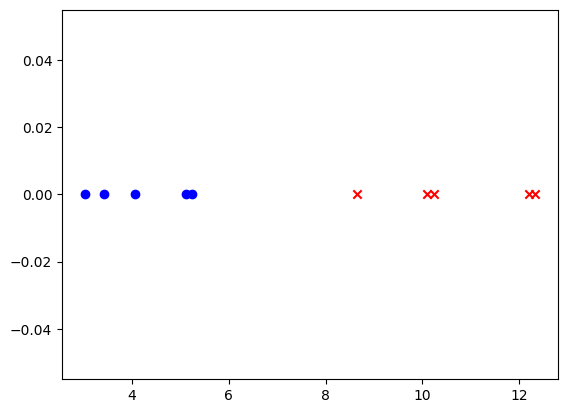

In [30]:
c = sw_inv@sb
value, vec = np.linalg.eig(c)
print(value)
print(vec)
pts = []
for d in data:
  pts.append(vec[0,0]*d[0] + vec[1,0]*d[1])

plt.scatter(pts[:5],[0 for _ in range(len(pts[:5]))],color='blue', marker='o', label='X1')
plt.scatter(pts[5:],[0 for _ in range(len(pts[5:]))],color='red', marker='x', label='X2')